In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ireo the corridors,sector 67a,1.62,9380.0,3.0,3.0,2,4.0,New Property,1346.0,0.0,0.0,1.0,0.0,0.0,1.0,142.0
1,flat,tulip violet,sector 69,1.43,8888.0,3.0,3.0,2,1.0,Relatively New,1455.0,0.0,0.0,0.0,1.0,0.0,0.0,86.0
2,flat,indiabulls centrum park,sector 103,2.45,8522.0,4.0,4.0,3,11.0,Relatively New,2602.0,1.0,1.0,1.0,1.0,0.0,0.0,38.0
3,house,my home,new sector 2,0.34,12593.0,2.0,2.0,2,2.0,Moderately Old,270.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
4,house,ansals palam vihar,sector 2,5.70,14729.0,5.0,5.0,2,2.0,Old Property,4550.0,0.0,0.0,0.0,1.0,0.0,2.0,94.0


In [4]:
df.shape

(3071, 18)

In [5]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [6]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 67a,1.62,3.0,3.0,2,4.0,New Property,1346.0,0.0,0.0,1.0,0.0,0.0,1.0,142.0
1,flat,sector 69,1.43,3.0,3.0,2,1.0,Relatively New,1455.0,0.0,0.0,0.0,1.0,0.0,0.0,86.0
2,flat,sector 103,2.45,4.0,4.0,3,11.0,Relatively New,2602.0,1.0,1.0,1.0,1.0,0.0,0.0,38.0
3,house,new sector 2,0.34,2.0,2.0,2,2.0,Moderately Old,270.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
4,house,sector 2,5.70,5.0,5.0,2,2.0,Old Property,4550.0,0.0,0.0,0.0,1.0,0.0,2.0,94.0


# luxury score

<Axes: ylabel='luxury_score'>

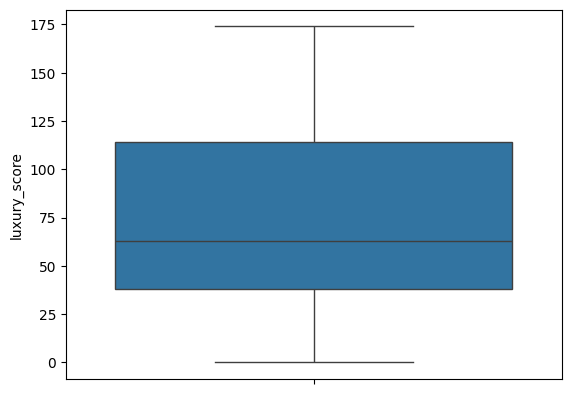

In [7]:
sns.boxplot(df['luxury_score'])

In [8]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [9]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [10]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 67a,1.62,3.0,3.0,2,4.0,New Property,1346.0,0.0,0.0,1.0,0.0,0.0,1.0,142.0,Medium
1,flat,sector 69,1.43,3.0,3.0,2,1.0,Relatively New,1455.0,0.0,0.0,0.0,1.0,0.0,0.0,86.0,Medium
2,flat,sector 103,2.45,4.0,4.0,3,11.0,Relatively New,2602.0,1.0,1.0,1.0,1.0,0.0,0.0,38.0,Low
3,house,new sector 2,0.34,2.0,2.0,2,2.0,Moderately Old,270.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,Low
4,house,sector 2,5.70,5.0,5.0,2,2.0,Old Property,4550.0,0.0,0.0,0.0,1.0,0.0,2.0,94.0,Medium


# floorNum

<Axes: ylabel='floorNum'>

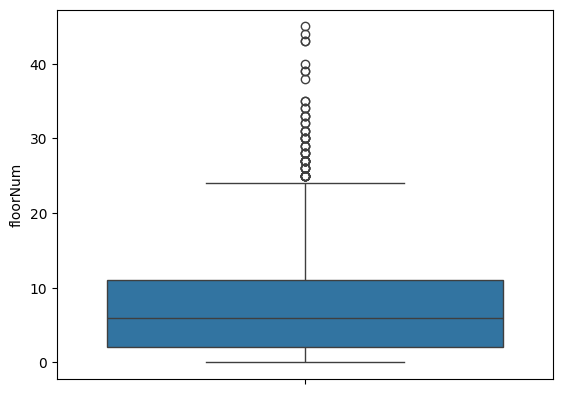

In [11]:
sns.boxplot(df['floorNum'])

In [12]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [13]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [14]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 67a,1.62,3.0,3.0,2,4.0,New Property,1346.0,0.0,0.0,1.0,0.0,0.0,1.0,142.0,Medium,Mid Floor
1,flat,sector 69,1.43,3.0,3.0,2,1.0,Relatively New,1455.0,0.0,0.0,0.0,1.0,0.0,0.0,86.0,Medium,Low Floor
2,flat,sector 103,2.45,4.0,4.0,3,11.0,Relatively New,2602.0,1.0,1.0,1.0,1.0,0.0,0.0,38.0,Low,High Floor
3,house,new sector 2,0.34,2.0,2.0,2,2.0,Moderately Old,270.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,Low,Low Floor
4,house,sector 2,5.70,5.0,5.0,2,2.0,Old Property,4550.0,0.0,0.0,0.0,1.0,0.0,2.0,94.0,Medium,Low Floor


In [15]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [16]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 67a,1.62,3.0,3.0,2,New Property,1346.0,0.0,0.0,1.0,0.0,0.0,1.0,Medium,Mid Floor
1,flat,sector 69,1.43,3.0,3.0,2,Relatively New,1455.0,0.0,0.0,0.0,1.0,0.0,0.0,Medium,Low Floor
2,flat,sector 103,2.45,4.0,4.0,3,Relatively New,2602.0,1.0,1.0,1.0,1.0,0.0,0.0,Low,High Floor
3,house,new sector 2,0.34,2.0,2.0,2,Moderately Old,270.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
4,house,sector 2,5.70,5.0,5.0,2,Old Property,4550.0,0.0,0.0,0.0,1.0,0.0,2.0,Medium,Low Floor


In [17]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [18]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,78.0,3.0,3.0,2.0,1.0,1346.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0
1,0.0,80.0,3.0,3.0,2.0,3.0,1455.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0
2,0.0,7.0,4.0,4.0,3.0,3.0,2602.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.0,4.0,2.0,2.0,2.0,0.0,270.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,27.0,5.0,5.0,2.0,2.0,4550.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066,0.0,88.0,4.0,6.0,4.0,1.0,2398.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
3067,0.0,46.0,3.0,3.0,4.0,1.0,1983.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3068,1.0,73.0,4.0,4.0,4.0,1.0,3950.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
3069,0.0,91.0,2.0,2.0,3.0,1.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


In [19]:
y_label

0       1.62
1       1.43
2       2.45
3       0.34
4       5.70
        ... 
3066    1.46
3067    1.98
3068    8.50
3069    1.10
3070    2.70
Name: price, Length: 3071, dtype: float64

# Technique 1 - Correlation Analysis

<Axes: >

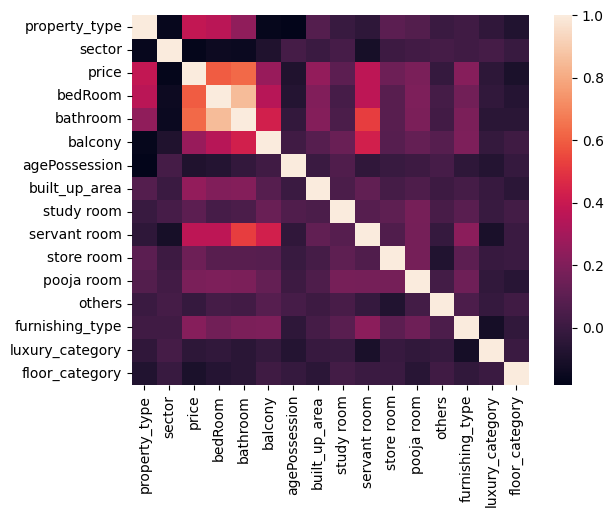

In [20]:
sns.heatmap(data_label_encoded.corr())

In [21]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.174541
1,price,1.000000
2,bedRoom,0.595517
3,bathroom,0.626055
4,balcony,0.267013
5,agePossession,-0.082661
6,built_up_area,0.251896
7,study room,0.099117
8,servant room,0.368405
9,store room,0.146844


# Technique 2 - Random Forest Feature Importance

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.651750
1,sector,0.149231
0,property_type,0.046714
3,bathroom,0.033889
2,bedRoom,0.022140
4,balcony,0.016139
5,agePossession,0.014770
8,servant room,0.013172
13,luxury_category,0.012291
12,furnishing_type,0.011648


# Technique 3 - Gradient Boosting Feature importances

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.693110
1,sector,0.136501
0,property_type,0.069859
3,bathroom,0.046119
8,servant room,0.021490
2,bedRoom,0.014084
12,furnishing_type,0.008455
9,store room,0.003000
4,balcony,0.001834
14,floor_category,0.001708


# Technique 4 - Permutation Importance

In [24]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.788778
1,sector,0.212541
0,property_type,0.086549
4,balcony,0.009429
12,furnishing_type,0.008655
8,servant room,0.008383
3,bathroom,0.005910
2,bedRoom,0.004399
13,luxury_category,0.002360
9,store room,0.000144


# Technique 5 - LASSO

In [25]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
3,bathroom,0.710972
0,property_type,0.451071
6,built_up_area,0.215619
2,bedRoom,0.184929
8,servant room,0.160302
12,furnishing_type,0.154036
9,store room,0.095675
7,study room,0.091176
4,balcony,0.072188
10,pooja room,0.037186


# Technique 6 - RFE

In [26]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.650789
1,sector,0.150819
0,property_type,0.049614
3,bathroom,0.032469
2,bedRoom,0.020797
4,balcony,0.015591
8,servant room,0.014171
5,agePossession,0.013633
13,luxury_category,0.012836
12,furnishing_type,0.011892


# Technique 7 - Linear Regression Weights

In [28]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
3,bathroom,0.709106
0,property_type,0.458690
6,built_up_area,0.223289
2,bedRoom,0.183609
8,servant room,0.164327
12,furnishing_type,0.161393
9,store room,0.101037
7,study room,0.099018
4,balcony,0.079434
10,pooja room,0.042194


# Technique 8 - SHAP

In [29]:
!pip install shap

  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
    --------------------------------------- 10.2/456.2 kB ? eta -:--:--
   --- ----------------------------------- 41.0/456.2 kB 393.8 kB/s eta 0:00:02
   ----- --------------------------------- 61.4/456.2 kB 409.6 kB/s eta 0:00:01
   ----- --------------------------------- 61.4/456.2 kB 409.6 kB/s eta 0:00:01
   ------- ------------------------------- 81.9/456.2 kB 383.3 kB/s eta 0:00:01
   --------- ---------------------------- 112.6/456.2 kB 344.8 kB/s eta 0:00:01
   ---------- --------------------------- 122.9/456.2 kB 327.4 kB/s eta 0:00:02
   ---------- --------------------------- 122.9/456.2 kB 327.4 kB/s eta 0:00:02
   ------------ ------------------------- 153.6/456.2 kB 328.1 kB/s eta 0:00:01
   -------------- ----------------------- 174.1/456.2 kB 338.5 kB/s eta 0:00:01
   -----


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   --- ------------------------------------ 2.6/28.1 MB 475.2 kB/s eta 0:00:54
   --- ------------------------------------ 2.6/28.1 MB 475.2 kB/s eta 0:00:54
   --- ------------------------------------ 2.6/28.1 MB 475.2 kB/s eta 0:00:54
   --- ------------------------------------ 2.6/28.1 MB 475.2 kB/s eta 0:00:54
   --- ------------------------------------ 2.6/28.1 MB 475.2 kB/s eta 0:00:54
   --- ------------------------------------ 2.6/28.1 MB 475.2 kB/s eta 0:00:54
   --- ------------------------------------ 2.6/28.1 MB 475.2 kB/s eta 0:00:54
   --- ------------------------------------ 2.6/28.1 MB 475.2 kB/s eta 0:00:54
   --- ------------------------------------ 2.6/28.1 MB 475.2 kB/s eta 0:00:54
   --- ------------------------------------ 2.6/28.1 MB 475.2 kB/s eta 0:00:54
   --- ------------------------------------ 2.6/28.1 MB 475.2 kB/s eta 0:00:54
   --- ------------------------------------ 2.6/28.1 MB 475.2 kB/s eta 0:00:54
   --- ------------------------------------ 2.6/28.

In [30]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-0.0469389 ,  0.23452196,  0.00819927, ..., -0.00433776,
        -0.00670889,  0.00413267],
       [-0.0465167 ,  0.07316782,  0.00345088, ..., -0.01297805,
        -0.01898402, -0.00368503],
       [-0.15009856, -0.36794628,  0.03198304, ..., -0.01739936,
         0.00990914,  0.04037377],
       ...,
       [ 0.54823927,  1.0028955 ,  0.07333955, ..., -0.00496107,
         0.08708426,  0.02553266],
       [-0.01450531, -0.07851376, -0.03346502, ..., -0.01175529,
        -0.00305916, -0.00736081],
       [-0.04908958,  0.88103615,  0.01514408, ..., -0.00151916,
         0.02429263, -0.00825232]])

In [31]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,0.890584
1,sector,0.361304
0,property_type,0.126823
3,bathroom,0.078847
8,servant room,0.039965
4,balcony,0.032367
2,bedRoom,0.030092
14,floor_category,0.027299
12,furnishing_type,0.024219
5,agePossession,0.020205


In [32]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [33]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.174541,0.149231,0.136501,0.212541,-0.103063,0.150819,-0.111619,0.361304
bedRoom,0.595517,0.022140,0.014084,0.004399,0.184929,0.020797,0.183609,0.030092
bathroom,0.626055,0.033889,0.046119,0.005910,0.710972,0.032469,0.709106,0.078847
balcony,0.267013,0.016139,0.001834,0.009429,0.072188,0.015591,0.079434,0.032367
agePossession,-0.082661,0.014770,0.001198,-0.001089,-0.026864,0.013633,-0.034511,0.020205
built_up_area,0.251896,0.651750,0.693110,0.788778,0.215619,0.650789,0.223289,0.890584
study room,0.099117,0.005971,0.001374,-0.002026,0.091176,0.005478,0.099018,0.010496
servant room,0.368405,0.013172,0.021490,0.008383,0.160302,0.014171,0.164327,0.039965
store room,0.146844,0.007694,0.003000,0.000144,0.095675,0.007189,0.101037,0.010871


In [34]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [35]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.689618
sector             0.179900
bathroom           0.035130
servant room       0.017121
bedRoom            0.016766
balcony            0.013042
furnishing_type    0.011548
agePossession      0.008610
luxury_category    0.007979
floor_category     0.006219
store room         0.005197
study room         0.003658
pooja room         0.002871
others             0.002343
dtype: float64

In [36]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,78.0,3.0,3.0,2.0,1.0,1346.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0
1,0.0,80.0,3.0,3.0,2.0,3.0,1455.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0
2,0.0,7.0,4.0,4.0,3.0,3.0,2602.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.0,4.0,2.0,2.0,2.0,0.0,270.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,27.0,5.0,5.0,2.0,2.0,4550.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066,0.0,88.0,4.0,6.0,4.0,1.0,2398.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
3067,0.0,46.0,3.0,3.0,4.0,1.0,1983.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3068,1.0,73.0,4.0,4.0,4.0,1.0,3950.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
3069,0.0,91.0,2.0,2.0,3.0,1.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


In [37]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [38]:
scores.mean()

np.float64(0.76744878640302)

In [39]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [40]:
scores.mean()

np.float64(0.7713173297255242)

In [41]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [42]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [43]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,78.0,3.0,3.0,2.0,1.0,1346.0,0.0,1.0,1.0,2.0,2.0,1.62
1,0.0,80.0,3.0,3.0,2.0,3.0,1455.0,0.0,0.0,0.0,2.0,1.0,1.43
2,0.0,7.0,4.0,4.0,3.0,3.0,2602.0,1.0,1.0,0.0,1.0,0.0,2.45
3,1.0,4.0,2.0,2.0,2.0,0.0,270.0,0.0,0.0,0.0,1.0,1.0,0.34
4,1.0,27.0,5.0,5.0,2.0,2.0,4550.0,0.0,0.0,2.0,2.0,1.0,5.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066,0.0,88.0,4.0,6.0,4.0,1.0,2398.0,1.0,0.0,0.0,2.0,2.0,1.46
3067,0.0,46.0,3.0,3.0,4.0,1.0,1983.0,0.0,0.0,1.0,1.0,0.0,1.98
3068,1.0,73.0,4.0,4.0,4.0,1.0,3950.0,0.0,0.0,0.0,2.0,1.0,8.50
3069,0.0,91.0,2.0,2.0,3.0,1.0,81.0,0.0,0.0,0.0,2.0,2.0,1.10
